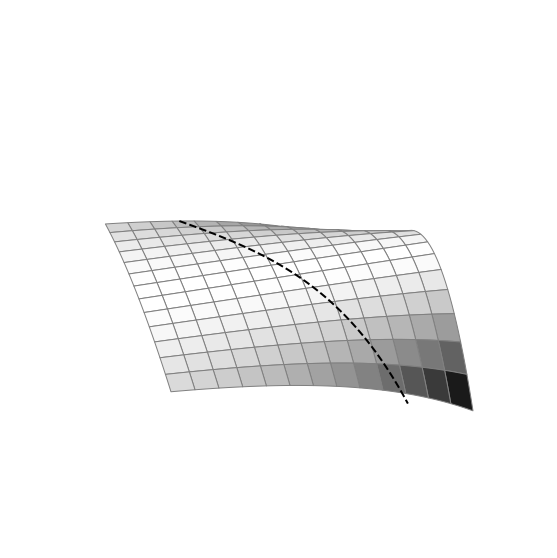

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#f(x,y,z)=0
x=y=np.arange(-1.0, 1.0, 0.05)
X,Y=np.meshgrid(x,y)
Z=-(1/3)*(X**2)*(np.exp(Y))

#곡선 C에 대한 변수 t와 x(t), y(t), z(t)
t=np.linspace(-0.5, 0.5, 100)
xt=np.array(2*t)
yt=np.array(t)
zt=-(1/3)*(xt**2)*(np.exp(yt))

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')

#곡면 그리기
ax.plot_surface(X,Y,Z, rstride=3, cstride=3, cmap=plt.cm.gray, edgecolor='gray', zorder=1)

#곡면 위를 지나는 곡선 C=[xt, yt, zt]^T
ax.plot3D(xt, yt, zt, '--', lw=2, color='k', zorder=10)

        

ax.set_zlim(-1,1)
ax.set_axis_off()
ax.view_init(35,-15)

plt.show()

In [5]:
import sympy as sp

x1=sp.Symbol('x1')
x2=sp.Symbol('x2')

f=-sp.Rational(1,3)*x1**2 * sp.E**x2

sp.derive_by_array(sp.derive_by_array(f, (x1, x2)), (x1, x2))


[[-2*exp(x2)/3, -2*x1*exp(x2)/3], [-2*x1*exp(x2)/3, -x1**2*exp(x2)/3]]

In [6]:
H= sp.derive_by_array(sp.derive_by_array(f, (x1,x2)), (x1, x2))
H.subs({x1:2, x2:0})

[[-2/3, -4/3], [-4/3, -4/3]]

In [7]:
import sympy as sp

x=sp.Symbol('x')
y=sp.Symbol('y')

f=50*(y-x**2)**2+ (2-x)**2

c=sp.derive_by_array(f,(x,y))
Hf=sp.derive_by_array(c, (x,y))

In [8]:
c

[-200*x*(-x**2 + y) + 2*x - 4, -100*x**2 + 100*y]

In [9]:
Hf

[[600*x**2 - 200*y + 2, -200*x], [-200*x, 100]]

In [11]:
first_ncs_sol=sp.solve(c)
first_ncs_sol

[{x: 2, y: 4}]

In [12]:
H=Hf.subs({x:first_ncs_sol[0][x], y: first_ncs_sol[0][y]})

In [13]:
H

[[1602, -400], [-400, 100]]

In [17]:
H=np.array(H).astype(np.float64).reshape(2,2)
lamda,_ =np.linalg.eig(H)

lamda

array([1.70188248e+03, 1.17516927e-01])

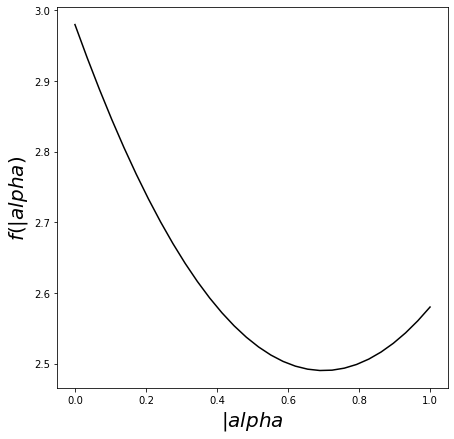

In [18]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(7,7))
ax= fig.add_subplot(1,1,1)

def f(X):
    return X[0]**2 + X[1]**2 +2
x_0=np.array([0.7, 0.7])
d= np.array([-1, 0])

def f_alpha(a):
    return f(x_0.reshape(2,1)+ a*d.reshape(2,1))

alphas= np. linspace(0, 1, 30)
ax.plot(alphas, f_alpha(alphas), 'k')
ax.set_xlabel(r'$|alpha$', fontsize=20)
ax.set_ylabel(r'$f(|alpha)$', fontsize=20)

plt.show()

In [19]:
def f1(X):
    return (X[0]+2*X[1]-7)**2 + (2*X[0]+X[1]-5)**2

def df1(X):
    dx0=2*(X[0]+2*X[1]-7)+4*(2*X[0]+X[1]-5)
    dx1=4*(X[0]+2*X[1]-7)+2*(2*X[0]+X[1]-5)
    return np.array([dx0, dx1])

def f2(X):
    return 50*(X[1]-X[0]**2)**2 + (2-X[0])**2

def df2(X):
    dx0= -200*X[0]*(X[1]-X[0]**2)-2*(2-X[0])
    dx1=  100*(X[1]-X[0]**2)
    return np.array([dx0, dx1])

In [75]:
import numpy as np
from scipy.optimize import line_search

def f1(X):
    return (X[0]+2*X[1]-7)**2 + (2*X[0]+X[1]-5)**2

def df1(X):
    dx0a= 2*(X[0]+2*X[1]-7) + 4*(2*X[0]+X[1]-5)
    dx1a= 4*(X[0]+2*X[1]-7) + 2*(2*X[0]+X[1]-5)
    return np.array([dx0a, dx1a])

def f2(X):
    return 50*(X[1]-X[0]**2)**2 + (2-X[0])**2

def df2(X):
    dx0b= -200*X[0]*(X[1]-X[0]**2)-2*(2-X[0])
    dx1b=  100*(X[1]-X[0]**2)
    return np.array([dx0b, dx1b])

#단계 1. 초기화: 시작점 x^(0)를 선정
x=np.array([0, 4.5 ])

#수렴 상수 엡실론 설정
def SDM(f, df, x, eps=1.0e-7):
    max_iter=10000
    
    #단계1. 반복 횟수 k=0으로 설정
    for k in range(max_iter):
        
        #단계2. 경사도벡터 게산: c^(k)=grad(f(x^(k)))를 계산
        c= df(x)
        
        
        #단계3. 수렴판정: c^(k)<엡실론이면 x^*=x^(k)로 두고 정지, 아니면 단계를 계속 진행
        if np.linalg.norm(c) < eps:
            print("Stop criterion break Iter.: {:5d}, x: {}".format(k. x))
            break
        
        #단계4. 강하 방향 설정: d^(k)=-c^(k)
        d=-c
        
        #단계5. 이동거리 계산: d^(k)를 따라 f(a)=f(x^(k)+a*d^(k))를 최소화하는 a_k를 계산
        alpha= line_search(f, df, x, d)[0]
        
        #단계6. 업데이트:x^(k+1)=x^(k)+a_k*d^(k)로 변수를 업데이트하고 k=k+1로 두고 단계 2로 가서 반복
        x=x+ alpha*d
        
    

      
    else:
        print("Stop max iter:{:5d} x:{}".format(k,x))
SDM(f1, df1, x)


AttributeError: 'int' object has no attribute 'x'

In [69]:
import numpy as np
from scipy.optimize import line_search

def f1(X):
    return (X[0]+2*X[1]-7)**2 + (2*X[0]+X[1]-5)**2

def df1(X):
    dx0=2*(X[0]+2*X[1]-7)+4*(2*X[0]+X[1]-5)
    dx1=4*(X[0]+2*X[1]-7)+2*(2*X[0]+X[1]-5)
    return np.array([dx0, dx1])

def f2(X):
    return 50*(X[1]-X[0]**2)**2 + (2-X[0])**2

def df2(X):
    dx0= -200*X[0]*(X[1]-X[0]**2)-2*(2-X[0])
    dx1=  100*(X[1]-X[0]**2)
    return np.array([dx0, dx1])

#단계 1. 초기화: 시작점 x^(0)를 선정
x=np.array([0, 4.5])

#수렴 상수 엡실론 설정
k=1
print("Stop criterion break Iter.: {:5d}, x: {}".format(k. x))
        

AttributeError: 'int' object has no attribute 'x'

In [46]:
import numpy as np
from scipy.optimize import line_search

def f1(X):
    return (X[0]+2*X[1]-7)**2 + (2*X[0]+X[1]-5)**2

def df1(X):
    dx0=2*(X[0]+2*X[1]-7)+4*(2*X[0]+X[1]-5)
    dx1=4*(X[0]+2*X[1]-7)+2*(2*X[0]+X[1]-5)
    return np.array([dx0, dx1])

def f2(X):
    return 50*(X[1]-X[0]**2)**2 + (2-X[0])**2

def df2(X):
    dx0= -200*X[0]*(X[1]-X[0]**2)-2*(2-X[0])
    dx1=  100*(X[1]-X[0]**2)
    return np.array([dx0, dx1])

#단계 1. 초기화: 시작점 x^(0)를 선정
x=np.array([0, 4.5])

#수렴 상수 엡실론 설정
def SDM(f, df, x, eps=1.0e-7, callback=None):
    max_iter=10000
    
    #단계1. 반복 횟수 k=0으로 설정
    for k in range(max_iter):
        
        #단계2. 경사도벡터 게산: c^(k)=grad(f(x^(k)))를 계산
        c= df(x)
x        

array([0. , 4.5])

In [49]:
import numpy as np
from scipy.optimize import line_search

def f1(X):
    return (X[0]+2*X[1]-7)**2 + (2*X[0]+X[1]-5)**2

def df1(X):
    dx0=2*(X[0]+2*X[1]-7)+4*(2*X[0]+X[1]-5)
    dx1=4*(X[0]+2*X[1]-7)+2*(2*X[0]+X[1]-5)
    return np.array([dx0, dx1])

def f2(X):
    return 50*(X[1]-X[0]**2)**2 + (2-X[0])**2

def df2(X):
    dx0= -200*X[0]*(X[1]-X[0]**2)-2*(2-X[0])
    dx1=  100*(X[1]-X[0]**2)
    return np.array([dx0, dx1])

#단계 1. 초기화: 시작점 x^(0)를 선정
x=np.array([0, 4.5])

#수렴 상수 엡실론 설정
def SDM(f, df, x, eps=1.0e-7, callback=None):
    max_iter=10000
    
    #단계1. 반복 횟수 k=0으로 설정
    for k in range(max_iter):
        
        #단계2. 경사도벡터 게산: c^(k)=grad(f(x^(k)))를 계산
        c= df(x)
        
        
        #단계3. 수렴판정: c^(k)<엡실론이면 x^*=x^(k)로 두고 정지, 아니면 단계를 계속 진행
        if np.linalg.norm(c) < eps:
            print("Stop criterion break Iter.: {:5d}, x: {}".format(k.x))
            break
             

In [50]:
SDM(f1, df1, x)

In [58]:
import numpy as np
from scipy.optimize import line_search
eps=1.0e-7
def f1(X):
    return (X[0]+2*X[1]-7)**2 + (2*X[0]+X[1]-5)**2

def df1(X):
    dx0=2*(X[0]+2*X[1]-7)+4*(2*X[0]+X[1]-5)
    dx1=4*(X[0]+2*X[1]-7)+2*(2*X[0]+X[1]-5)
    return np.array([dx0, dx1])

def f2(X):
    return 50*(X[1]-X[0]**2)**2 + (2-X[0])**2

def df2(X):
    dx0= -200*X[0]*(X[1]-X[0]**2)-2*(2-X[0])
    dx1=  100*(X[1]-X[0]**2)
    return np.array([dx0, dx1])

#단계 1. 초기화: 시작점 x^(0)를 선정
x=np.array([0, 4.5])

c= df1(x)

if np.linalg.norm(c) < eps:
    
    print("Stop criterion break Iter.: {:5d}, x: {}".format(k.x))
    

d=-c
        
        #단계5. 이동거리 계산: d^(k)를 따라 f(a)=f(x^(k)+a*d^(k))를 최소화하는 a_k를 계산
alpha= line_search(f1, df1, x, d)[0]
        
        #단계6. 업데이트:x^(k+1)=x^(k)+a_k*d^(k)로 변수를 업데이트하고 k=k+1로 두고 단계 2로 가서 반복
x= x+ alpha*d

x
    

array([-0.14058355,  4.00795756])

In [80]:
#단계1. 초기화: 시작점 x^(0)를 선정
x=np.array([0,4.5])

def CGM(f, df, x, eps=1.0e-7, callback=None):
    max_iter=10000
    
    #단계1. 반복 횟수 k=0으로 설정
    for k in range(max_iter):
        #단계2. 경사도벡터 계산: c^(k)=grad(f(x^(k)))
        c=df(x)
        #단계3. 수렴판정: c^(k)<엡실론이면 x^*=x^(k)로 두고 정지, 아니면 단계를 계속 진행
        if np. linalg.norm(c)<eps:
            print("Stop criterion break Iter: {:5d}, x: {}".format(k,x))
            break
        
        if k==0:
            d=-c
        else:
            beta=(np.linalg.norm(c)/np.linalg.norm(c_old))**2
            d=-c+beta*d
        #단계 5. 이동거리 계산: d^(k)를 따라 f(a)=f(x^(k)+a*d^(k))를 최소화하는
        #                  a_k를 계산
        alpha= line_search(f, df, x, d, c2=0.1)[0]
        
        #단계 6. 업데이트: x^(k+1)=(x^(k)+a_k*d^(k))로 변수를 업데이트하고
        #                  k=k+1로 두고 2로 가서 반복
        x=x+alpha*d
        
        #단계 7. 현재 정보 저장
        c_old=c.copy()
        
        if callback:
            callback(x)
    else:
        print("Stop max iter:{:5d} x:{}".format(l,x))
        
CGM(f1, df1, x)
        

Stop criterion break Iter:     2, x: [1. 3.]


In [81]:
#1.초기화: 시작점 x^(0)를 선정
x=np.array([-1,2])

CGM(f2,df2,x)

Stop criterion break Iter:    89, x: [1.99999993 3.99999972]


In [82]:
from scipy import optimize

x=np.array([-1,2])
result_scipy=optimize.fmin_cg(f2, x)

result_scipy

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 264
         Gradient evaluations: 88


array([1.99999356, 3.99997423])